# Zadanie_2b 
**Do utworzenia szeregu czasowego posłużono się średnimi cenami w miesiącu ropy naftowej na giełdzie za rok 2021**


**Dane są to ceny średnie ceny baryłki ropy za dany miesiąc dane odczytano ze strony: https://pl.investing.com/commodities/brent-oil-historical-data**

In [1]:
#Pobieramy zestaw niezbędnych pakietów
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Tworzymy dane za pomocą słownika
dict = {
    'Miesiąc': ['styczeń','luty','marzec','kwiecień','maj','czerwiec','lipiec','sierpień','wrzesień','październik','listopad','grudzień'],
    'Cena' : [55.88,66.13,63.54,67.25,69.32,75.13,76.33,72.99,78.52,84.38,70.57,77.78]
}

In [3]:
# Przekształcamy oraz zapisujmy dane za pomocą dataframe do pliku z roszrzeniem.CSV
df = pd.DataFrame(dict)
df.to_csv('/home/studentb10/Sprawozdanie_Dawid_Ewa/Zadanie_2/plik_b.csv')
print(df)

        Miesiąc   Cena
0       styczeń  55.88
1          luty  66.13
2        marzec  63.54
3      kwiecień  67.25
4           maj  69.32
5      czerwiec  75.13
6        lipiec  76.33
7      sierpień  72.99
8      wrzesień  78.52
9   październik  84.38
10     listopad  70.57
11     grudzień  77.78


In [4]:
# Oczyszczamy dane tak aby pozostały same wartości liczbowe w celu możliwości ich dalszej analizy
vals = (df['Cena'].tolist())
print(vals)

[55.88, 66.13, 63.54, 67.25, 69.32, 75.13, 76.33, 72.99, 78.52, 84.38, 70.57, 77.78]


In [5]:
# Analizujemy dane w tym celu pobieramy odpowiednie pakiety
import scipy
import statsmodels
import statistics as stat
import scipy.stats as stats

## Opisane dane
* wartość maksymalna

* wartość minimalna

* wartość oczekiwana

* mediana

* kwartyl dolny

* kwartyl górlny

* wariancja

* odchylenie standardowe


In [6]:
# Wartość maksymalna
max(vals)

84.38

In [7]:
# Wartość minimalna
min(vals)

55.88

In [8]:
# Wartość oczekiwana
stat.mean(vals)

71.485

In [9]:
# Mediana
stat.median(vals)

71.78

In [10]:
# Kwartyl dolny
np.percentile(vals,25)

66.97

In [11]:
# Kwartyl górny
np.percentile(vals,75)

76.6925

In [12]:
# Wariancja
stat.variance(vals)

59.38173636363634

In [13]:
# Odchylenie standardowe
stat.stdev(vals)

7.705954604306746

In [14]:
# Odczytujemy wcześniej zapisany plik  i oznaczmy sobie zmienne osi
df = pd.read_csv('/home/studentb10/Sprawozdanie_Dawid_Ewa/Zadanie_2/plik_b.csv')
x=df['Miesiąc']
y=df['Cena']

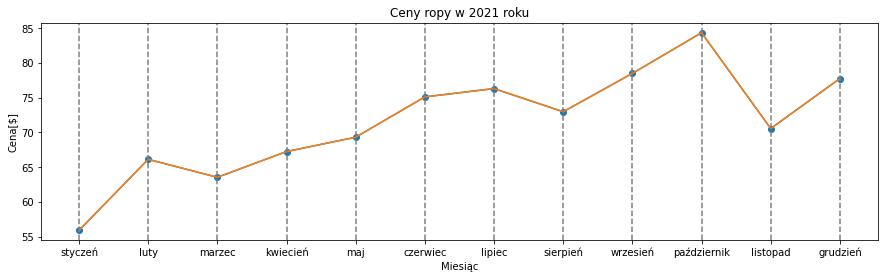

In [15]:
# Tworzymy pierwszy wykres  prezentujący ceny ropy w 2021 roku.
fig, ax = plt.subplots(figsize=(15,4))
plt.xlabel('Miesiąc')
plt.ylabel('Cena[$]')
plt.title('Ceny ropy w 2021 roku')
plt.plot(df["Cena"], marker='o')
ax.plot(x, y)
for xc in df[('Miesiąc')]:
    plt.axvline(x=xc, color='gray', linestyle='--')

## Wskazanie sezonowości lub trendu
Widać bezpośrednio że sezonowość nie występuje. Natomiast tendencja wzrostowa jest już zauważalna do tego celu posłużymy się wygładzaniem linowym, tak aby poznać średnie za odpowiedni kwartał roku.


In [16]:
# Na początku liczmy średnie z 3 miesięcy.
from collections import deque
n = 3
d = deque(maxlen=n)

x = [d.append(e) or sum(d)/float(n) for e in vals][n-1:]
# Funkcja policzyła średnie lecz dla każdego z miesięcy, do dalszej analizy potrzebujemt wyłącznie I,II,III,IV kwartał, dlatego odzielamy je od zbioru.
x1 = [round(x[0],2),round(x[3],2),round(x[6],2),round(x[9],2)]
print(x1)
#Tworzymy zmienną kwartały na potrzeby wykresu.
values = ["1","2","3","4"]

[61.85, 70.57, 75.95, 77.58]


In [17]:
# Ponownie definiujemy zmienne
df = pd.read_csv('/home/studentb10/Sprawozdanie_Dawid_Ewa/Zadanie_2/plik_b.csv')
x=df['Miesiąc']
y=df['Cena']

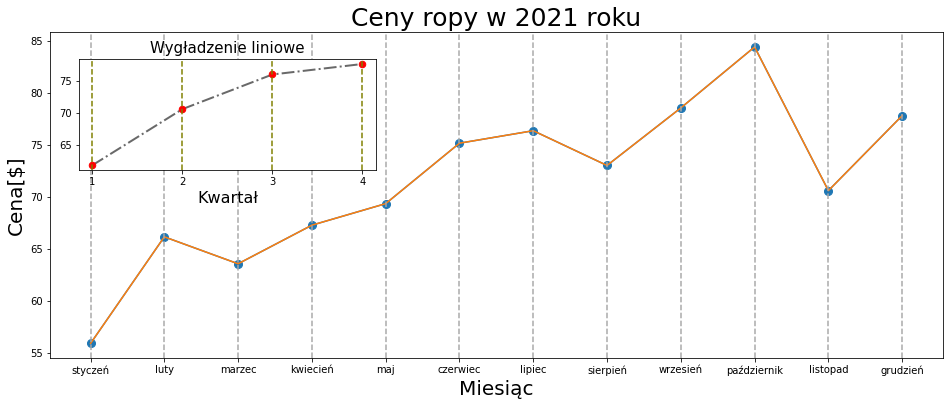

In [18]:
# Tworzymy dwa wykresy, lecz aby zobaczyć trend umieszczony został na tle dużego wykresu mniejszy prezentujący wygładzenie liniowe dla poszczególnych kwartałów.
# Widać, iż wykres pomocniczy pokazuje trend wzrostowy.
fig, ax = plt.subplots(figsize=(16,6))
plt.xlabel('Miesiąc',size = 20)
plt.ylabel('Cena[$]', size = 20)
plt.title('Ceny ropy w 2021 roku',size = 25)
plt.plot(df["Cena"], marker='o',markersize = 8)
ax.plot(x, y)
for xc in df[('Miesiąc')]:
    plt.axvline(x=xc, color='darkgrey', linestyle='--')
ax2 = fig.add_axes([0.15, 0.560, 0.258, 0.258])
plt.xlabel('Kwartał',size = 16,)
plt.title('Wygładzenie liniowe',size = 15)
ax2.plot(values,x1,color = "dimgray", lw = 2, label = "Średnia",marker="o",linestyle='dashdot',markeredgecolor = "red",markerfacecolor = "red",markersize = 6.5)
for xc2 in values:
    plt.axvline(x=xc2, color='olive', linestyle='--')

Powyżej widać, iż trend jest wzrostowy ceny ropy w roku 2021 wzrastał z każdym miesiącem.
# Koniec zadania 2b